# Dask dataframe demonstration

In [58]:
import numpy as np
import pandas as pd

import dask.dataframe as dd

Création de 2400 dates séaprées de 1h

In [59]:
index = pd.date_range("2021-09-01", periods=2400, freq="1h")
index

DatetimeIndex(['2021-09-01 00:00:00', '2021-09-01 01:00:00',
               '2021-09-01 02:00:00', '2021-09-01 03:00:00',
               '2021-09-01 04:00:00', '2021-09-01 05:00:00',
               '2021-09-01 06:00:00', '2021-09-01 07:00:00',
               '2021-09-01 08:00:00', '2021-09-01 09:00:00',
               ...
               '2021-12-09 14:00:00', '2021-12-09 15:00:00',
               '2021-12-09 16:00:00', '2021-12-09 17:00:00',
               '2021-12-09 18:00:00', '2021-12-09 19:00:00',
               '2021-12-09 20:00:00', '2021-12-09 21:00:00',
               '2021-12-09 22:00:00', '2021-12-09 23:00:00'],
              dtype='datetime64[ns]', length=2400, freq='h')

Création d'un dataframe pandas de dates avec 3 colonnes.

1. "a" : un indetifiant de 0 à 2399
1. "b" : un caratère pris de la liste `"abcaddbe" * 300` (8 caractères * 300 = 2400 lignes) un par un et répartis sur chaque ligne
1. la colonne index : une date parmi les 2400 dates générées plus haut (peremt de labéliser ou identifier la ligne de façon unique, comme la clé primaire dans une BDD relationnelle)

In [60]:
df = pd.DataFrame({"a": np.arange(2400), "b": list("abcaddbe" * 300)}, index=index)
df

,a,b
2021-09-01 00:00:00,0,a
2021-09-01 01:00:00,1,b
2021-09-01 02:00:00,2,c
2021-09-01 03:00:00,3,a
2021-09-01 04:00:00,4,d
...,...,...
2021-12-09 19:00:00,2395,a
2021-12-09 20:00:00,2396,d
2021-12-09 21:00:00,2397,d
2021-12-09 22:00:00,2398,b


Création d'un dataframe dask à partir du dataframe pandas en demandant de répartir les données sur 10 paprtitions.

In [61]:
ddf = dd.from_pandas(df, npartitions=10)
ddf

,a,b
npartitions=10,,
2021-09-01 00:00:00,int64,string
2021-09-11 00:00:00,...,...
...,...,...
2021-11-30 00:00:00,...,...
2021-12-09 23:00:00,...,...


Vérification des indicdes de début et de fin de chaque partition (l'indice de fin d'une partition est l'indice de début de la partition suivante - 1).

In [62]:
ddf.divisions

(Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-09-11 00:00:00'),
 Timestamp('2021-09-21 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-10-11 00:00:00'),
 Timestamp('2021-10-21 00:00:00'),
 Timestamp('2021-10-31 00:00:00'),
 Timestamp('2021-11-10 00:00:00'),
 Timestamp('2021-11-20 00:00:00'),
 Timestamp('2021-11-30 00:00:00'),
 Timestamp('2021-12-09 23:00:00'))

Accès à une partition particulière

In [63]:
ddf.partitions[1]

,a,b
npartitions=1,,
2021-09-11,int64,string
2021-09-21,...,...


## Indexation

API simiaire à celle du DataFrame pandas et de des tableaus NumPy.

L'exemple suivant sélectionne la colonne "b" avec le DataFrame dask et le DataFrame pandas.

In [64]:
df["b"] # Ou df.b

2021-09-01 00:00:00    a
2021-09-01 01:00:00    b
2021-09-01 02:00:00    c
2021-09-01 03:00:00    a
2021-09-01 04:00:00    d
                      ..
2021-12-09 19:00:00    a
2021-12-09 20:00:00    d
2021-12-09 21:00:00    d
2021-12-09 22:00:00    b
2021-12-09 23:00:00    e
Freq: h, Name: b, Length: 2400, dtype: object

In [65]:
ddf.b # ou ddf["a"]

Dask Series Structure:
npartitions=10
2021-09-01 00:00:00    string
2021-09-11 00:00:00       ...
                        ...  
2021-11-30 00:00:00       ...
2021-12-09 23:00:00       ...
Dask Name: getitem, 2 expressions
Expr=df['b']

Sélection d'un intervalles d'indices

In [66]:
df["2021-10-01": "2021-10-09 5:00"]

,a,b
2021-10-01 00:00:00,720,a
2021-10-01 01:00:00,721,b
2021-10-01 02:00:00,722,c
2021-10-01 03:00:00,723,a
2021-10-01 04:00:00,724,d
...,...,...
2021-10-09 01:00:00,913,b
2021-10-09 02:00:00,914,c
2021-10-09 03:00:00,915,a
2021-10-09 04:00:00,916,d


In [67]:
ddf["2021-10-01": "2021-10-09 5:00"]

,a,b
npartitions=1,,
2021-10-01 00:00:00.000000000,int64,string
2021-10-09 05:00:59.999999999,...,...


On remarque que dask n'évalue pas tout de suite l'opération (lazy).

## Calcul ou évaluation des résultats

Dask est paresseux (lazy). Il faut donc appeler la méthode `compute()` pour évaluer les résultats.

In [68]:
ddf["2021-10-01": "2021-10-09 5:00"].compute()

,a,b
2021-10-01 00:00:00,720,a
2021-10-01 01:00:00,721,b
2021-10-01 02:00:00,722,c
2021-10-01 03:00:00,723,a
2021-10-01 04:00:00,724,d
...,...,...
2021-10-09 01:00:00,913,b
2021-10-09 02:00:00,914,c
2021-10-09 03:00:00,915,a
2021-10-09 04:00:00,916,d


## Méthodes (ou api)

Simlaire à NumPy et pandas, sauf qu'il faut considérer que Dask est paresseux (lazy) et qu'il faut appeler la méthode `compute()` pour évaluer les résultats.

In [69]:
ddf.head()

,a,b
2021-09-01 00:00:00,0,a
2021-09-01 01:00:00,1,b
2021-09-01 02:00:00,2,c
2021-09-01 03:00:00,3,a
2021-09-01 04:00:00,4,d


In [70]:
ddf.a.mean() # Non ca

<dask_expr.expr.Scalar: expr=df['a'].mean(), dtype=float64>

In [71]:
ddf.a.mean().compute()

np.float64(1199.5)

In [72]:
ddf.b.unique()

Dask Series Structure:
npartitions=10
    string
       ...
     ...  
       ...
       ...
Dask Name: unique, 3 expressions
Expr=Unique(frame=df['b'])

In [73]:
ddf.b.unique().compute()

0    e
0    c
1    d
0    a
0    b
Name: b, dtype: string

On peut chainer les appels de méthodes. 

Ici, on récupère la somme cumulée de la colonne "a" pour l'intervalle `["2021-10-01": "2021-10-09 5:00"]` et on lui soustrait 100.

In [74]:
result = ddf["2021-10-01": "2021-10-09 5:00"].a.cumsum() - 100
result

Dask Series Structure:
npartitions=1
2021-10-01 00:00:00.000000000    int64
2021-10-09 05:00:59.999999999      ...
Dask Name: sub, 5 expressions
Expr=CumSum(frame=(LocSlice(frame=df, iindexer=slice(Timestamp('2021-10-01 00:00:00'), Timestamp('2021-10-09 05:00:59.999999999'), None)))['a'], skipna=True) - 100

In [75]:
result.compute()

2021-10-01 00:00:00       620
2021-10-01 01:00:00      1341
2021-10-01 02:00:00      2063
2021-10-01 03:00:00      2786
2021-10-01 04:00:00      3510
                        ...  
2021-10-09 01:00:00    158301
2021-10-09 02:00:00    159215
2021-10-09 03:00:00    160130
2021-10-09 04:00:00    161046
2021-10-09 05:00:00    161963
Freq: h, Name: a, Length: 198, dtype: int64

### Somme cumulée

Calcule la somme au fut et à mesure des lignes. La somme totale ou final se situera à la dernière ligne.

Voici un exemple avec Pandas (Series et une DataFrame en une seule dimension, ou une colonne d'un DataFrame).

In [76]:
s = pd.Series([2, np.nan, 5, -1, 0])
s

0    2.0
1    NaN
2    5.0
3   -1.0
4    0.0
dtype: float64

In [77]:
s.cumsum()

0    2.0
1    NaN
2    7.0
3    6.0
4    6.0
dtype: float64

## Graphe de tâches

Grâhe de tâches de la variable `result` qui correspond à la somme cumulée calculée précédemment. La méthode `visualize()` nécessite d'installer le binaire de `graphviz` (via votre gestionnaire de paquets ou via un installeur fourni [sur le site officiel](https://graphviz.org/download/)) ainsiq que le module qui porte le même nom.

In [78]:
result.dask

{('sub-5a8ce658ce881b9a168109251a3109de',
  0): <Task ('sub-5a8ce658ce881b9a168109251a3109de', 0) sub(...)>,
 ('cumulativefinalize-26a6f68b010d9b3b81956d1fe88e1d08',
  0): ('cumsum-dc13e540bc07335397aa375278c5fa3f', 0),
 ('operation-5630c696a59039a7a9170475b5e6abe8',
  0): <Task ('operation-5630c696a59039a7a9170475b5e6abe8', 0) operation(...)>,
 ('cumsum-dc13e540bc07335397aa375278c5fa3f',
  0): <Task ('cumsum-dc13e540bc07335397aa375278c5fa3f', 0) cumsum(...)>,
 ('getitem-f1025e3e21b7f218b241648926d54bdc',
  0): <Task ('getitem-f1025e3e21b7f218b241648926d54bdc', 0) getitem(...)>,
 ('loc-fff6b95ce0f38ef749afb35f08fb5c77',
  0): <Task ('loc-fff6b95ce0f38ef749afb35f08fb5c77', 0) loc(...)>,
 ('partitions-bf0af511f3f618def961c7abe2804060',
  0): Alias(('partitions-bf0af511f3f618def961c7abe2804060', 0)->('frompandas-9e3ad60c306d3e285fbbed807f12dcbe', 3)),
 ('frompandas-9e3ad60c306d3e285fbbed807f12dcbe',
  0): DataNode(                       a  b
 2021-09-01 00:00:00    0  a
 2021-09-01 01:00:

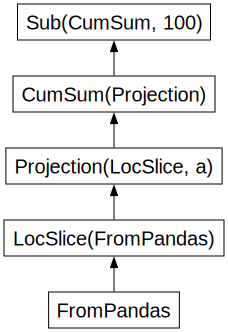

In [79]:
result.visualize()

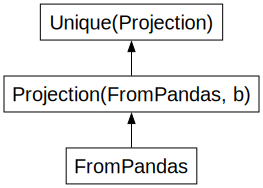

In [80]:
uq = ddf.b.unique()
uq.compute()
uq.visualize()